In [4]:
#Ayşe SAYIN
#504191555
#########################
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
from statistics import mean
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from networkx.algorithms import degree_centrality as DC, eigenvector_centrality as EC
from networkx.algorithms import bridges, local_reaching_centrality as TCC, percolation_centrality as LAPC
from networkx.algorithms import betweenness_centrality as BC, communicability_betweenness_centrality as CBC
from networkx.algorithms import edge_current_flow_betweenness_centrality as RWBC, information_centrality as IC
from networkx.algorithms import subgraph_centrality as SC, communicability_betweenness_centrality as CBC
from networkx.algorithms import katz_centrality as KC, pagerank as PR, closeness_centrality as CC

#import any other  modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################


### NOTES:   
### The number of nodes is given less then 200 nodes to decrease the execution time.
### All of the centrality measures could not find 10 of them is found.
### Katz centrality measure needs increasing of max_iter parameter for larger graphs.
###  current_flow_betweenness_centrality, communicability_betweenness_centrality and average_neighbor_degree need connected graphs. Graphs are created randomly, so sometimes these measurements give an unconnected graph error. 

## Part A: Examine training sets

Enter number of nodes
30
Enter value of probability of every node
0.15


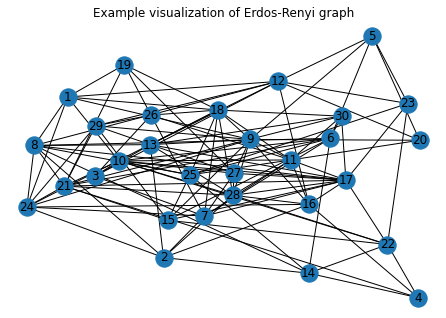

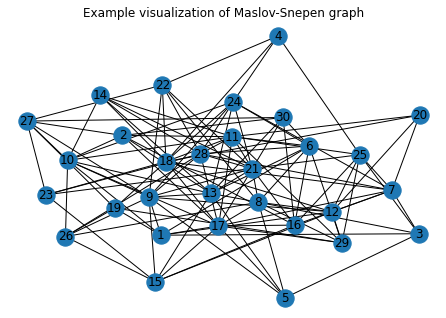

In [5]:
#Implement Part A
def erdos_renyi(G, P):
    # Add edges to the graph randomly.
    for i in g.nodes():
        for j in g.nodes():
            if (i < j):
                # Take random number R.
                R = random.random()
                # Check if R<P add the edge to the graph else ignore.
                if (R < P):
                    g.add_edge(i, j, weight=random.randint(1, 20))

def create_unweighted_random_graph(G, P):
    for i in g.nodes():
        for j in g.nodes():
            if (i < j):

                # Take random number R.
                R = random.random()

                # Check if R<P add the edge to the graph else ignore.
                if (R < P):
                    g.add_edge(i, j)


def find_correlation(measurement_list, correlation_lists_list):
    for i in measurement_list:
        correlation_list = []
        for j in i:
            for k in i:
                if(j < k):
                    a, b = stats.spearmanr(j, k)
                    correlation_list.append(a)
        correlation_lists_list.append(correlation_list)


def create_data_set(measurement_list, data_for_mean, data_for_std):
    for i in measurement_list:
        correlation_list = []
        for j in i:
            for k in i:
                a, b = stats.spearmanr(j, k)
                correlation_list.append(a)
                mean_correlation = sum(correlation_list) / len(correlation_list)
                std = np.std(correlation_list)
                data_for_std[i.index(j)][i.index(k)] = std
                data_for_mean[i.index(j)][i.index(k)] = mean_correlation



# Take N number of nodes from user 
print("Enter number of nodes")
N = int(input())

# Take P probability value for edges
print("Enter value of probability of every node")
P = float(input())

listOfWeightedGraphs = []
listOfUnweightedGraphs = []


for i in range(0, 20):
    # Create an empty graph object for erdos renyi algorithm
    g = nx.Graph()
    # Adding nodes
    g.add_nodes_from(range(1, N + 1))
    erdos_renyi(g, P)
    listOfWeightedGraphs.append(g)

    #create new graph for maslov snepen
    g1 = nx.Graph()
    g1.add_nodes_from(range(1, N + 1))
    create_unweighted_random_graph(g1, P)
    g1 = nx.random_reference(g, 1, True, 1)
    listOfUnweightedGraphs.append(g1)

# plot created weighted and unweighted graphs respectively.
nx.draw(g, with_labels=1)
plt.title("Example visualization of Erdos-Renyi graph")
plt.show()

nx.draw(g1, with_labels=1)
plt.title("Example visualization of Maslov-Snepen graph")
plt.show()



1.Erdos-Renyi (ER) graphs are simple generative models for generating random graphs. In this graphs, each edge of all pairs are independent from all of other edges. 
In Erdos-Rengi graph algorithm n nodes are generated and then edge between the pair of nodes is created with a probability p. This process is done for all pair of nodes. Therefore, each pair of nodes behaves independently.

2.Key properties of the Erdos-Renyi model are node number of the graph and the probability parameter p. Firstly, node number of the graph is selected. After that, each pair of nodes is connected with each other with probability p. 
This properties create a random generative graph model.

3.Maslov-Sneppen algorithm simply takes a graph as a parameter and uses an iterative rewiring procedure on that graph. A random graph with a given degree distrubution can be implemented with this algorithm. It is simply takes a graph as a parameter and rewire its edges with a randomized technique. For instance, given the edges a—b and c—d is simply changed as a—d and b—d.

4.Key properties of the Maslov-Sneppen algorithm is its rewiring graphs’ edges technique and its graph parameter.

5.Visualization of the wannted graph is done.


## Part B: Implement Naive Bayes Classifier

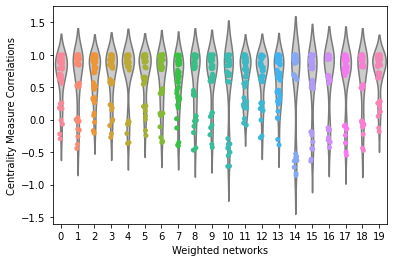

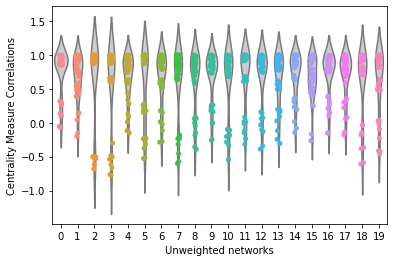

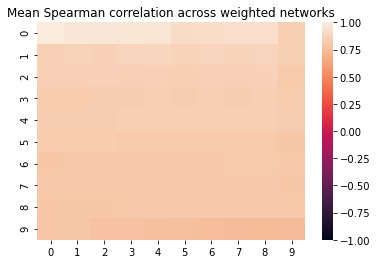

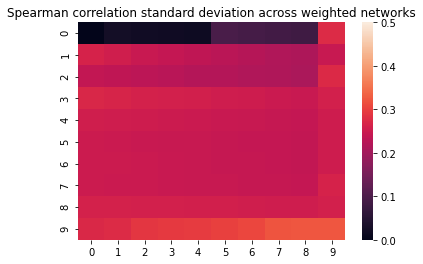

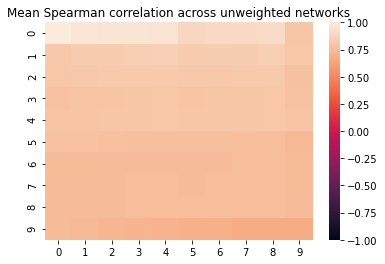

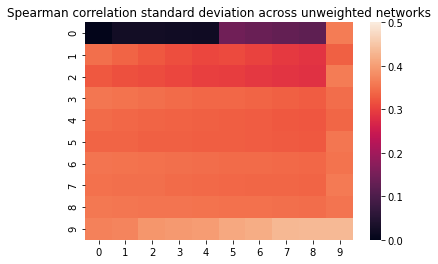

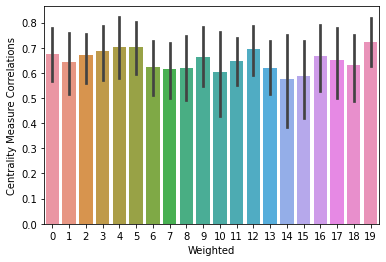

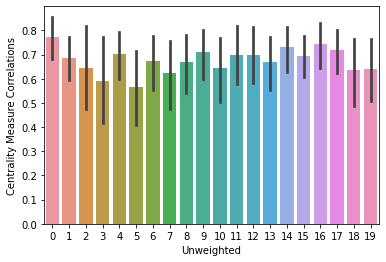

In [6]:
#Implement PART B:
list_of_weighted_cms_lists = []
list_of_unweighted_cms_lists = []

# Centrality measurements for weighted graphs
for i in listOfWeightedGraphs:
    centrality_measurements = []
    centrality_measurements.append(list(nx.degree_centrality(i).values()))
    centrality_measurements.append(list(nx.eigenvector_centrality(i).values()))
    centrality_measurements.append(list(nx.betweenness_centrality(i).values()))
    centrality_measurements.append(list(nx.subgraph_centrality(i).values()))
    centrality_measurements.append(list(nx.katz_centrality(i, max_iter=10000000).values()))
    centrality_measurements.append(list(nx.pagerank(i).values()))
    centrality_measurements.append(list(nx.closeness_centrality(i).values()))
    centrality_measurements.append(list(nx.current_flow_betweenness_centrality(i).values()))
    centrality_measurements.append(list(nx.communicability_betweenness_centrality(i).values()))
    centrality_measurements.append(list(nx.average_neighbor_degree(i).values()))
    list_of_weighted_cms_lists.append(centrality_measurements)

# Centrality measurements for unweighted graphs
for i in listOfUnweightedGraphs:
    centrality_measurements = []
    centrality_measurements.append(list(nx.degree_centrality(i).values()))
    centrality_measurements.append(list(nx.eigenvector_centrality(i).values()))
    centrality_measurements.append(list(nx.betweenness_centrality(i).values()))
    centrality_measurements.append(list(nx.subgraph_centrality(i).values()))
    centrality_measurements.append(list(nx.katz_centrality(i, max_iter=10000000).values()))
    centrality_measurements.append(list(nx.pagerank(i).values()))
    centrality_measurements.append(list(nx.closeness_centrality(i).values()))
    centrality_measurements.append(list(nx.current_flow_betweenness_centrality(i).values()))
    centrality_measurements.append(list(nx.communicability_betweenness_centrality(i).values()))
    centrality_measurements.append(list(nx.average_neighbor_degree(i).values()))
    list_of_unweighted_cms_lists.append(centrality_measurements)

list_of_weighted_correlations_lists = []
list_of_unweighted_correlations_lists = []

find_correlation(list_of_weighted_cms_lists, list_of_weighted_correlations_lists)

#plot figure 2 for weighted graphs
ax = sns.violinplot(data=list_of_weighted_correlations_lists, inner=None, color=".8")
ax = sns.stripplot(data=list_of_weighted_correlations_lists)
plt.xlabel("Weighted networks")
plt.ylabel("Centrality Measure Correlations")
plt.show()

find_correlation(list_of_unweighted_cms_lists, list_of_unweighted_correlations_lists)

#plot figure 2 for unweighted graphs
ax = sns.violinplot(data=list_of_unweighted_correlations_lists, inner=None, color=".8")
ax = sns.stripplot(data=list_of_unweighted_correlations_lists)
plt.xlabel("Unweighted networks")
plt.ylabel("Centrality Measure Correlations")
plt.show()

# plot figure 3 for weighted graphs
centrality_measurement_count = len(list_of_weighted_cms_lists[0])
data_for_mean = [ [ 0 for i in range(centrality_measurement_count) ] for j in range(centrality_measurement_count) ]
data_for_std = [ [ 0 for i in range(centrality_measurement_count) ] for j in range(centrality_measurement_count) ]

create_data_set(list_of_weighted_cms_lists, data_for_mean, data_for_std)

#mean
ax = sns.heatmap(data=data_for_mean, vmin=-1, vmax=1)
plt.title("Mean Spearman correlation across weighted networks")
plt.show()

#std
ax = sns.heatmap(data=data_for_std, vmin=0, vmax=0.5)
plt.title("Spearman correlation standard deviation across weighted networks")
plt.show()

# plot figure 3 for unweighted graphs
create_data_set(list_of_unweighted_cms_lists, data_for_mean, data_for_std)

#mean
ax = sns.heatmap(data=data_for_mean, vmin=-1, vmax=1)
plt.title("Mean Spearman correlation across unweighted networks")
plt.show()

#std
ax = sns.heatmap(data=data_for_std, vmin=0, vmax=0.5)
plt.title("Spearman correlation standard deviation across unweighted networks")
plt.show()

#plot figure 4 for weighted graphs
ax = sns.barplot(data=list_of_weighted_correlations_lists)
plt.xlabel("Weighted")
plt.ylabel("Centrality Measure Correlations")
plt.show()

#plot figure 4 for unweighted graphs
ax = sns.barplot(data=list_of_unweighted_correlations_lists)
plt.xlabel("Unweighted")
plt.ylabel("Centrality Measure Correlations")
plt.show()


1.Figure 2 is visualized.

2.Centrality measurements of different networks are calculated to investigate the similarity of the graphs. Spearman correlation is calculated with using these centrality measures. Figure 2 shows the distrubution of the centrality measurement correlations (CMC) of created graphs. Then Figure 2 shows that there is a considerable heterogenity in CMC models in different networks despite networks have a tendency on high and positive CMC.

3.Figure 3 is visualized.

4.Mean CMC for each pair of measures across all networks and standard deviation of CMCs across networksa re used for determining which pairs of centrality measures were consistently correlated accross networks. Therefore, standard deviation and mean of the each pair of the metrics are calculated for unweighted and weighted networks. Correlations of each pair of centrality measures can be seen in Figure 3. Then, to examine the networks we can choose one of the metrics to decrease the computation time or complexity.

5.In Figure 4, CMC distrubutions of the weighted and unweighted graphs are shown. With Figure 5, it can be seen that which CMCs are close to each other and we can compare them. Also we an see the most corraleted metric. 


## Part C: Implement K-Fold Cross Validation

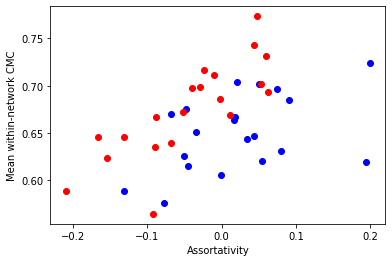

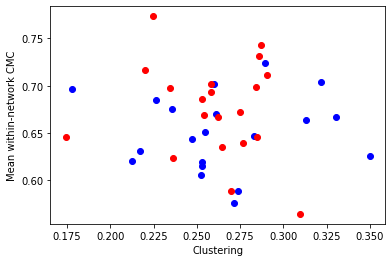

In [7]:
#Implement PART C:

#plot figure 5
mean_list_for_weighted = []
mean_list_for_unweighted = []
assortativity_list_weighted = []
clustering_list_weighted = []
assortativity_list_unweighted = []
clustering_list_unweighted = []


for i in listOfWeightedGraphs:
    assortativity_list_weighted.append(nx.degree_assortativity_coefficient(i, weight='weight'))
    clustering_list_weighted.append(nx.average_clustering(i))

for i in listOfUnweightedGraphs:
    assortativity_list_unweighted.append(nx.degree_assortativity_coefficient(i))
    clustering_list_unweighted.append(nx.average_clustering(i))

for i in list_of_weighted_correlations_lists:
    mean = sum(i) / len(i)
    mean_list_for_weighted.append(mean)

for i in list_of_unweighted_correlations_lists:
    mean = sum(i) / len(i)
    mean_list_for_unweighted.append(mean)

plt.scatter(assortativity_list_weighted, mean_list_for_weighted, c='blue')
plt.scatter(assortativity_list_unweighted, mean_list_for_unweighted, c='red')
plt.xlabel("Assortativity")
plt.ylabel("Mean within-network CMC")
plt.show()

plt.scatter(clustering_list_weighted, mean_list_for_weighted, c='blue')
plt.scatter(clustering_list_unweighted, mean_list_for_unweighted, c='red')
plt.xlabel("Clustering")
plt.ylabel("Mean within-network CMC")
plt.show()

1.Figure 5 is visualized.

2.In Figure 5, mean CMC values across different networks are examined. It is seen that mean CMC values are related with differences of global topological properties of those networks. Then, relation between two of global network properties and main within-network CMC values is investigated.It is seen that higher mean within-network CMC is correlated with lower values of assortativity and higher values of clustering in unweighted networks. Similar results are also obtained for weighted networks.
